In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

## Standardised Data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [10]:
scaled_data = scaler.fit_transform(df.drop('Outcome',axis=1))

## Convert to PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=3)

In [13]:
x_pca = pca.fit_transform(scaled_data)

In [14]:
x_pca.shape

(768, 3)

<AxesSubplot:>

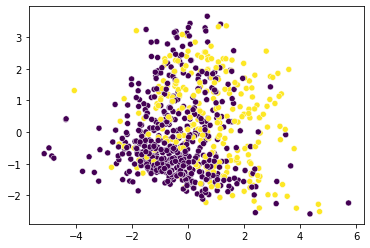

In [15]:
sns.scatterplot(x_pca[:,0],x_pca[:,1],c=df['Outcome'])

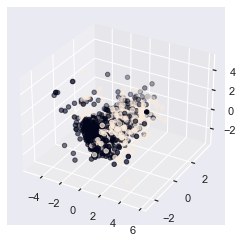

In [16]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = x_pca[:,0]
y = x_pca[:,1]
z = x_pca[:,2]

ax.scatter(x, y, z,c=df['Outcome'])

plt.show()

# Logistic Regression

### 1. Without PCA

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
reg = LogisticRegression()

In [21]:
reg.fit(X_train,y_train)

LogisticRegression()

In [22]:
predictions = reg.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       150
           1       0.75      0.63      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [25]:
print(confusion_matrix(y_test,predictions))

[[133  17]
 [ 30  51]]


### 2. With PCA 

In [26]:
X = x_pca
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
reg = LogisticRegression()

In [28]:
reg.fit(X_train,y_train)

LogisticRegression()

In [29]:
predictions = reg.predict(X_test)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



In [31]:
print(confusion_matrix(y_test,predictions))

[[129  21]
 [ 42  39]]


# Support Vector Machine

### 1. Without PCA

In [32]:
from sklearn.svm import SVC

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [35]:
param_grid= {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [36]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)

In [37]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [38]:
predictions = grid.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [40]:
print(confusion_matrix(y_test,predictions))

[[129  21]
 [ 38  43]]


### 2. With PCA

In [41]:
X = x_pca
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [42]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)

In [43]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [44]:
predictions = grid.predict(X_test)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.48      0.56        81

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [46]:
print(confusion_matrix(y_test,predictions))

[[131  19]
 [ 42  39]]
